In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('sample-superstore-subset-excel.csv',encoding='latin 1')

In [3]:
# Display the first few rows and summary statistics
#display first few rows
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,28-05-2012,30-05-2012,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07-07-2010,08-07-2010,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,27-07-2011,27-07-2011,998.2023,8,1446.67,88523


In [4]:
# display statastics
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,139.236410,13.798430,949.706272,82318.489073
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,998.486483,15.107688,2598.019818,19149.448857
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,16332.414000,170.000000,100119.160000,91591.000000


In [5]:
# Handle missing values
# first check for missing values
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [6]:
# As we can see there are 72 missing values in 'Product Base Margin ' column.this is numerical column so we ant drop.so we will replace missing values with "mean"
df['Product Base Margin']= df['Product Base Margin'].fillna(df['Product Base Margin'].mean()) 
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [7]:
# Convert data types if necessary
 # check for data types
df.dtypes

Row ID                    int64
Order Priority           object
Discount                float64
Unit Price              float64
Shipping Cost           float64
Customer ID               int64
Customer Name            object
Ship Mode                object
Customer Segment         object
Product Category         object
Product Sub-Category     object
Product Container        object
Product Name             object
Product Base Margin     float64
Region                   object
State or Province        object
City                     object
Postal Code               int64
Order Date               object
Ship Date                object
Profit                  float64
Quantity ordered new      int64
Sales                   float64
Order ID                  int64
dtype: object

In [8]:
# AS we can see "order date" and "ship date" in onject format.we will change that to datetime format.
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
#check
df.dtypes

C:\Users\santy\AppData\Local\Temp\ipykernel_27744\3134818573.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Order Date"] = pd.to_datetime(df["Order Date"])
C:\Users\santy\AppData\Local\Temp\ipykernel_27744\3134818573.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Ship Date"] = pd.to_datetime(df["Ship Date"])


Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [9]:
# Create any new columns needed for analysis
df["Gross profit"] = df["Profit"]/df["Sales"]

#check
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Gross profit
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,0.223729
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522,0.350500
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523,-0.954327
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523,-0.732709
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523,0.690000


Text(0.5, 1.0, 'Sales by resion')

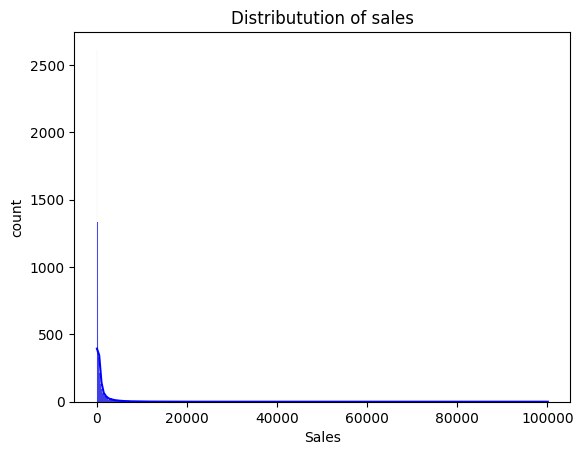

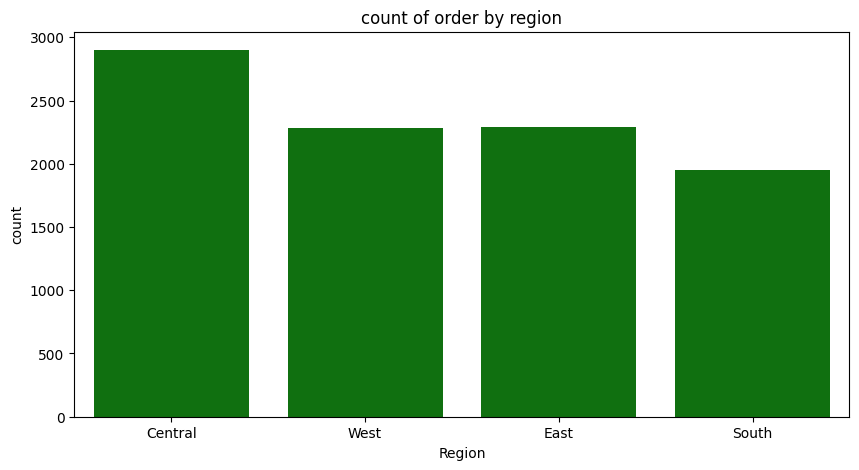

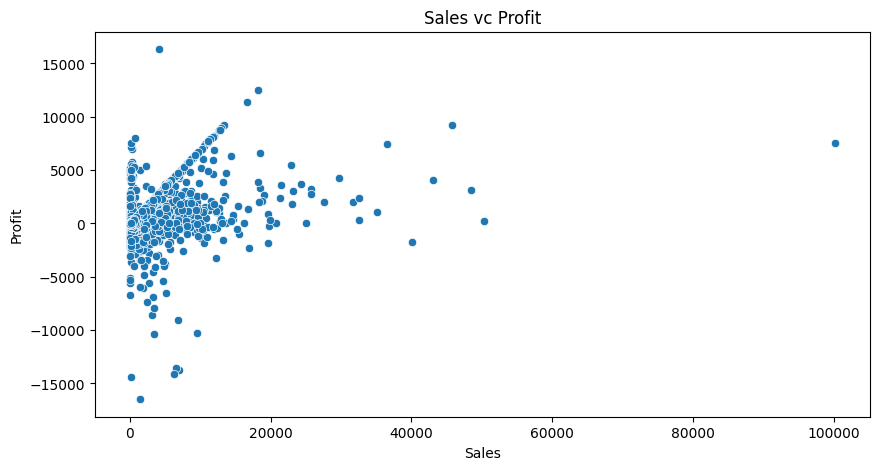

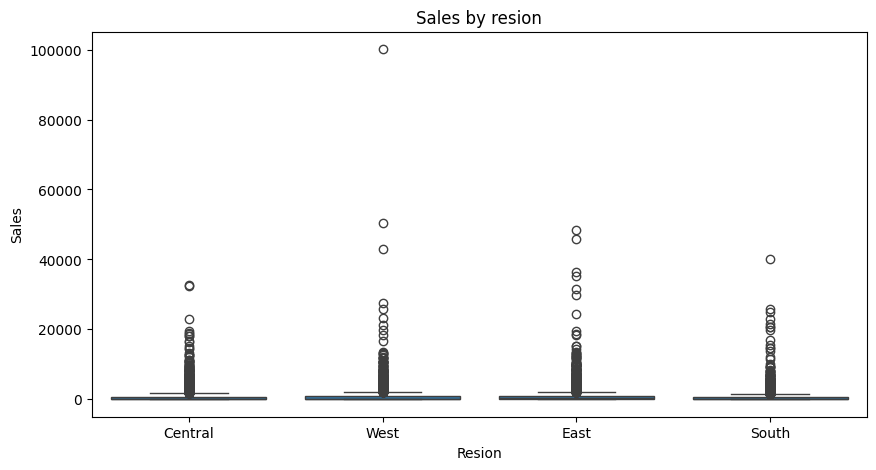

In [13]:
#univeriate and Bivariate analysis

#distribution of sales(histo for sales column)
plt.Figure(figsize=(10,5))
sns.histplot(df["Sales"],color="blue",alpha = 0.7,kde=True)
plt.xlabel("Sales")
plt.ylabel("count")
plt.title("Distributution of sales")

#countplot for order and region
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Region",color="Green")
plt.xlabel("Region")
plt.ylabel("count")
plt.title("count of order by region")

#scatter plot for sales vc profit
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="Sales",y="Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vc Profit")


#Boxplot for sales by resion
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="Region",y="Sales")
plt.xlabel("Resion")
plt.ylabel("Sales")
plt.title("Sales by resion")


In [14]:
# Summary statistics for key variables
# Key variables
key_variable = ["Sales","Profit","Quantity ordered new","Discount"]

# now  summary stats
stats=df[key_variable].describe()
print(stats)

# find profit for each product category 
pc_profit=df.groupby("Product Category")["Profit"].sum()

print(pc_profit)

# now find sales in different Regions
RegionWiseSales = df.groupby("Region")["Sales"].sum()

print(RegionWiseSales)

               Sales        Profit  Quantity ordered new     Discount
count    9426.000000   9426.000000           9426.000000  9426.000000
mean      949.706272    139.236410             13.798430     0.049628
std      2598.019818    998.486483             15.107688     0.031798
min         1.320000 -16476.838000              1.000000     0.000000
25%        61.282500    -74.017375              5.000000     0.020000
50%       203.455000      2.567600             10.000000     0.050000
75%       776.402500    140.243850             17.000000     0.080000
max    100119.160000  16332.414000            170.000000     0.250000
Product Category
Furniture          177354.298188
Office Supplies    451990.216493
Technology         683097.884742
Name: Profit, dtype: float64
Region
Central    2540341.62
East       2422804.68
South      1597346.22
West       2391438.80
Name: Sales, dtype: float64


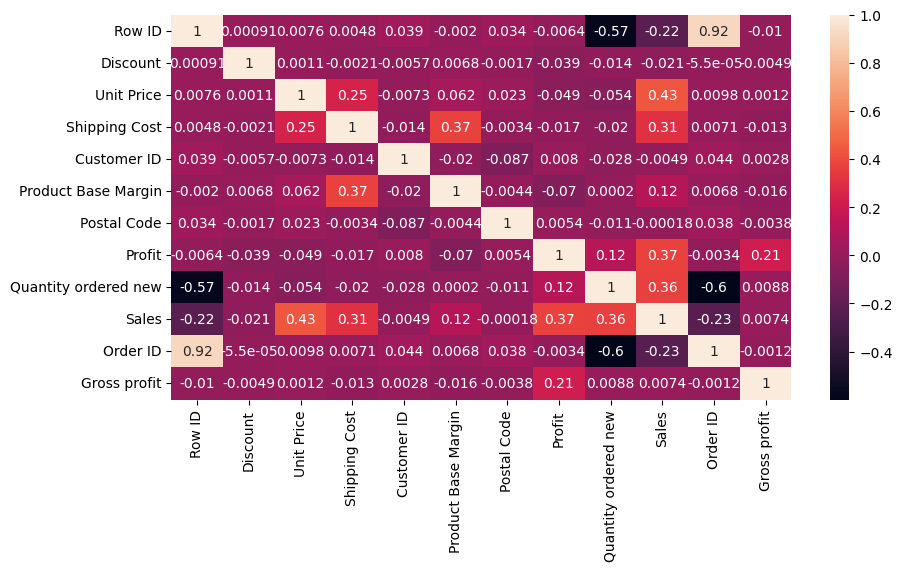

In [15]:
# Selecting only numeric columns 
numeric_columns = df.select_dtypes(include=[np.number])

# plotting heatmap for numeric column
plt.figure(figsize=(10,5))
sns.heatmap(numeric_columns.corr(),annot=True)
plt.show()

In [16]:
# Identifying top-performing product categories based on total sales and profi

category = df.groupby('Product Category').aggregate({"Sales":"sum","Profit":"sum"})

# now top category for sales
Top_category_sales = category.sort_values("Sales",ascending=False)

# top category for profit
Top_category_Profit = category.sort_values("Profit",ascending=False)

# now we wanted top 10
print("top 10 :\n",Top_category_sales.head(10))

top 10 :
                        Sales         Profit
Product Category                           
Technology        3514982.03  683097.884742
Furniture         3178623.74  177354.298188
Office Supplies   2258325.55  451990.216493


C:\Users\santy\AppData\Local\Temp\ipykernel_27744\4170132873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_category_sales.index, y=Top_category_sales["Sales"],palette='viridis')
C:\Users\santy\AppData\Local\Temp\ipykernel_27744\4170132873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_category_Profit.index, y=Top_category_Profit["Profit"],palette='viridis')


Text(0.5, 1.0, 'Total profit by product category')

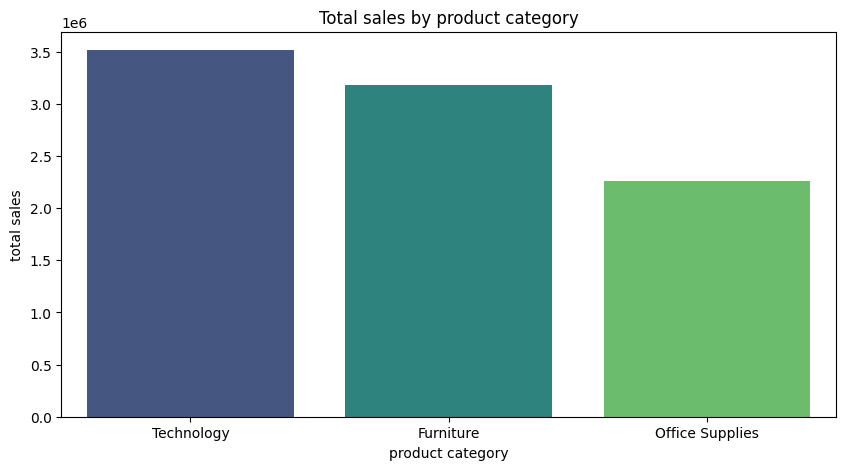

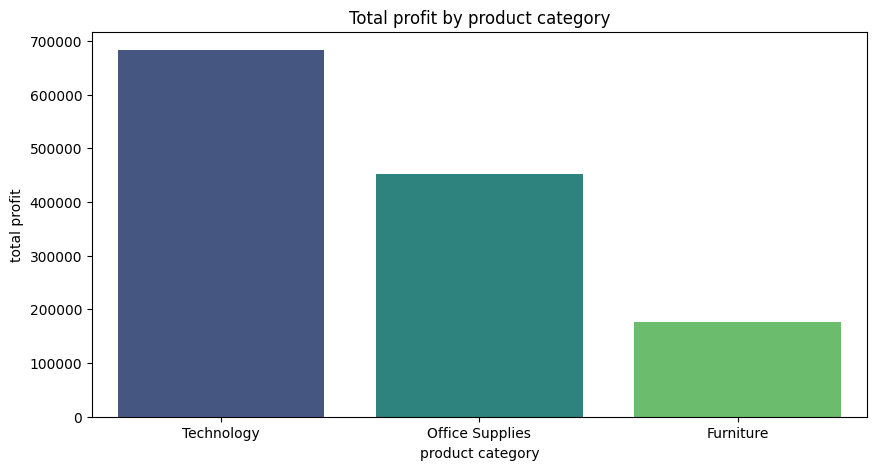

In [17]:
# Plotting total sales by product category
plt.figure(figsize=(10,5))
sns.barplot(x=Top_category_sales.index, y=Top_category_sales["Sales"],palette='viridis')
plt.xlabel("product category")
plt.ylabel("total sales")
plt.title("Total sales by product category")
    
# Plotting total profit by product category   
plt.figure(figsize=(10,5))
sns.barplot(x=Top_category_Profit.index, y=Top_category_Profit["Profit"],palette='viridis')
plt.xlabel("product category")
plt.ylabel("total profit")
plt.title("Total profit by product category")

In [18]:
#Generating summary statistics for each region
summary_for_each_region = df.groupby("Region").describe()

#display summary statistics
print(summary_for_each_region)

         Row ID                                                            \
          count          mean    min       25%      50%      75%      max   
Region                                                                      
Central  2899.0  21009.057261   52.0  19692.50  21825.0  24161.5  26387.0   
East     2289.0  19120.730887    2.0  18709.00  21421.0  23779.0  26389.0   
South    1954.0  21172.882805  257.0  19770.75  21986.5  24323.0  26399.0   
West     2284.0  19591.675569   64.0  18973.00  21346.0  23897.5  26397.0   

                     Discount            ... Order ID                \
                 std    count      mean  ...      max           std   
Region                                   ...                          
Central  5031.383479   2899.0  0.049348  ...  91582.0  15071.723809   
East     7195.690558   2289.0  0.050000  ...  91591.0  23259.222646   
South    4947.572889   1954.0  0.049401  ...  91589.0  14856.277937   
West     6750.747199   2284.0  0.0

Correlation coefficient between Sales and Profit : 0.37158306976794586


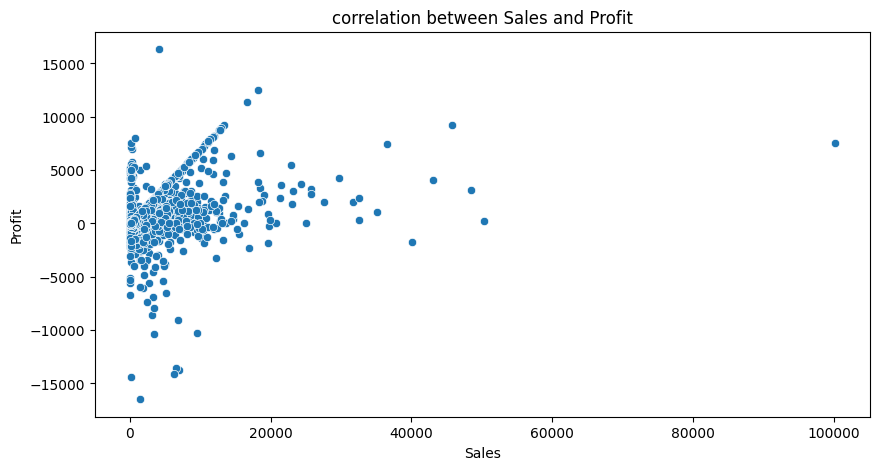

In [19]:
# Visualizing the correlation between sales and profit

plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x="Sales",y="Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("correlation between Sales and Profit")

# Displaying the correlation coefficient
#calculating coefficient
coefficient = df["Sales"].corr(df["Profit"])

# dispay
print("Correlation coefficient between Sales and Profit :",coefficient)

C:\Users\santy\AppData\Local\Temp\ipykernel_27744\850549710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Sales_by_Ship_Mode.index,y=Sales_by_Ship_Mode.values,palette='magma')


Ship Mode
Delivery Truck    3706516.02
Express Air        701756.34
Regular Air       4543658.96
Name: Sales, dtype: float64


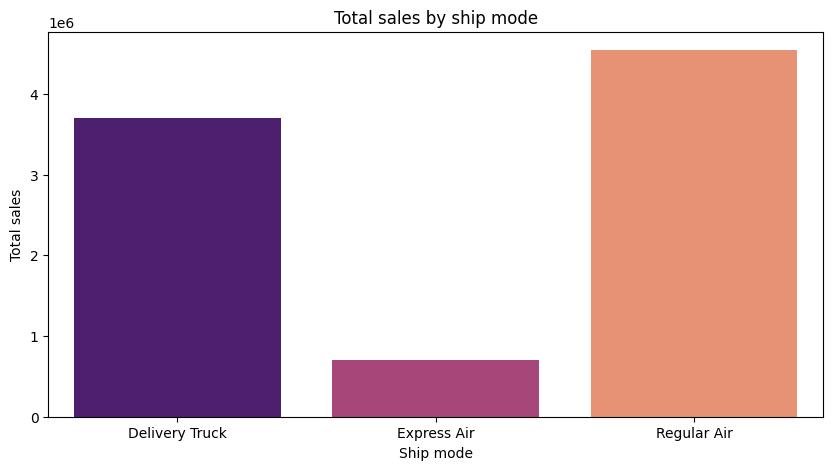

In [21]:
# Comparing sales across different ship modes

# group data by ship mode
Sales_by_Ship_Mode = df.groupby("Ship Mode")["Sales"].sum()

# plot bar chart for the comparision
plt.figure(figsize=(10,5))
sns.barplot(x=Sales_by_Ship_Mode.index,y=Sales_by_Ship_Mode.values,palette='magma')
plt.xlabel("Ship mode")
plt.ylabel("Total sales")
plt.title("Total sales by ship mode")
print(Sales_by_Ship_Mode)

In [22]:
# Print column names to verify
df.columns
# All column names are clean

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Gross profit'],
      dtype='object')

In [23]:

# Ensure 'Ship Date' column is datetime type(yes)
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
Gross profit                   float64
dtype: object